In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import paths
import logging
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
from blockhead.gdax import data

In [15]:
import pathlib
pair='ETH-USD'

In [16]:
path = pathlib.Path('output', pair, str(60))

In [17]:
barfile = path / '2018-02-22'
barfile.absolute()

PosixPath('/Users/mcw/projects/blockhead/output/ETH-USD/60/2018-02-22')

In [ ]:
bars = data.get_bars('ETH-USD', '2018-01-01', '2018-02-25', 60, 'output')

In [19]:
%matplotlib notebook

In [115]:
# mins minute bars, 12/26 ema cross
mins = 60 
bars['ema12'] = bars['close'].ewm(span=mins*12).mean()
bars['ema26'] = bars['close'].ewm(span=mins*26).mean()
bars['signal'] = 0
# go long only when 12 crosses 26
bars.loc[bars['ema12'] > bars['ema26'], 'signal'] = 1

<IPython.core.display.Javascript object>


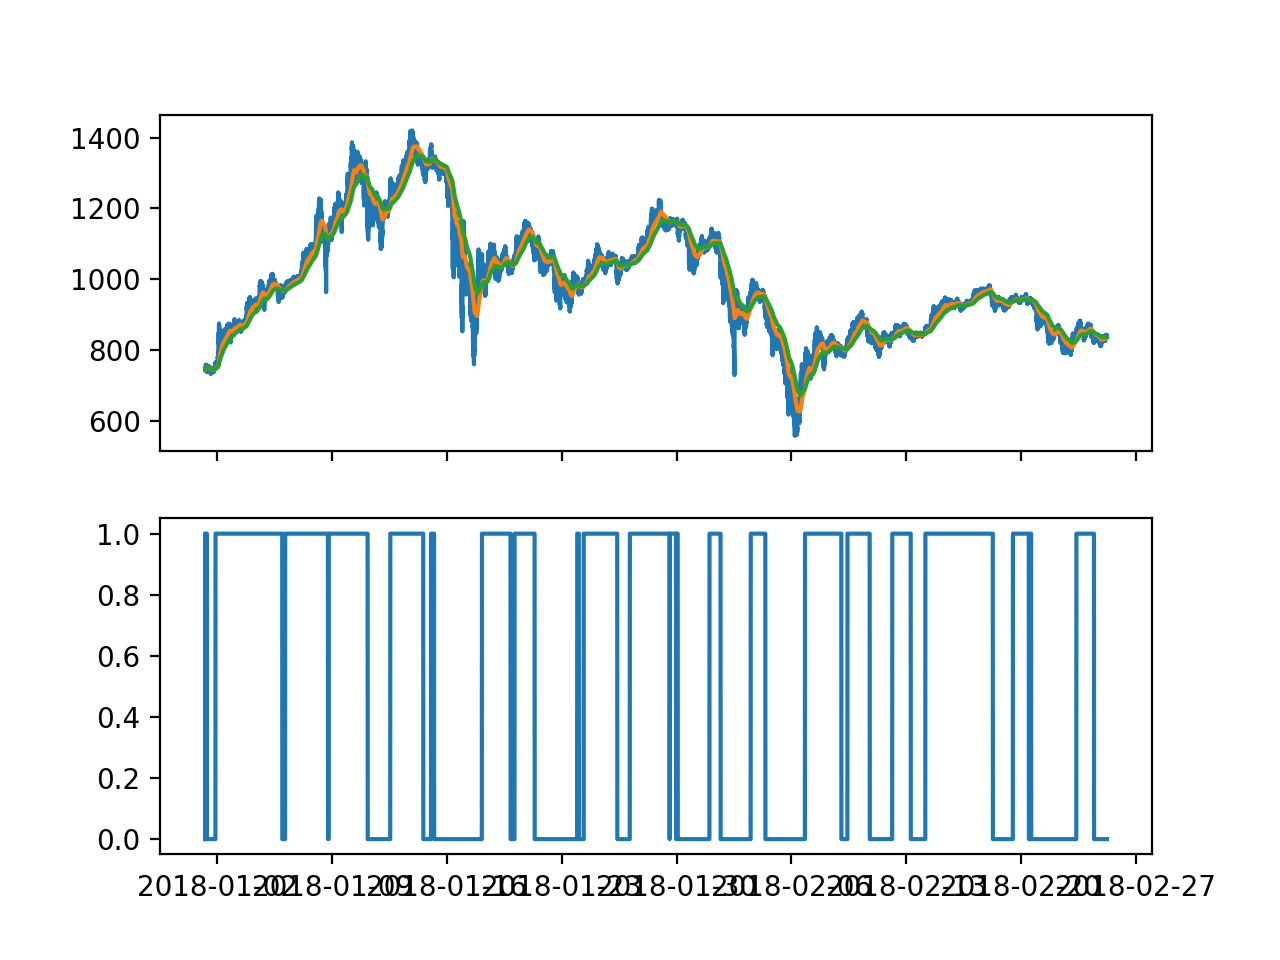

In [116]:
(fig, axes) = plt.subplots(2, 1, sharex=True)
axes[0].plot(bars[['close', 'ema12', 'ema26']])
axes[1].plot(bars['signal'])

In [117]:
returns = bars['close'] - bars['close'].shift()

In [118]:
returns.head()

close_time
2018-01-01 06:00:00+00:00     NaN
2018-01-01 06:01:00+00:00    0.01
2018-01-01 06:02:00+00:00    0.00
2018-01-01 06:03:00+00:00    0.00
2018-01-01 06:04:00+00:00   -1.97
Name: close, dtype: float64

In [119]:
returns.sum()

95.30000000000007

In [120]:
on = returns.loc[bars['signal'] == 1]
on.sum()

334.3499999999998

In [121]:
off = returns.loc[bars['signal'] == 0]
off.sum()

-239.04999999999973

In [122]:
len(bars)

79231

In [123]:
returns.mean()/returns.std()

0.0004807545201654683

In [129]:
on.mean()/on.std()

0.003732584125195821

In [125]:
off.mean()/off.std()

-0.0023091641921624754

<IPython.core.display.Javascript object>


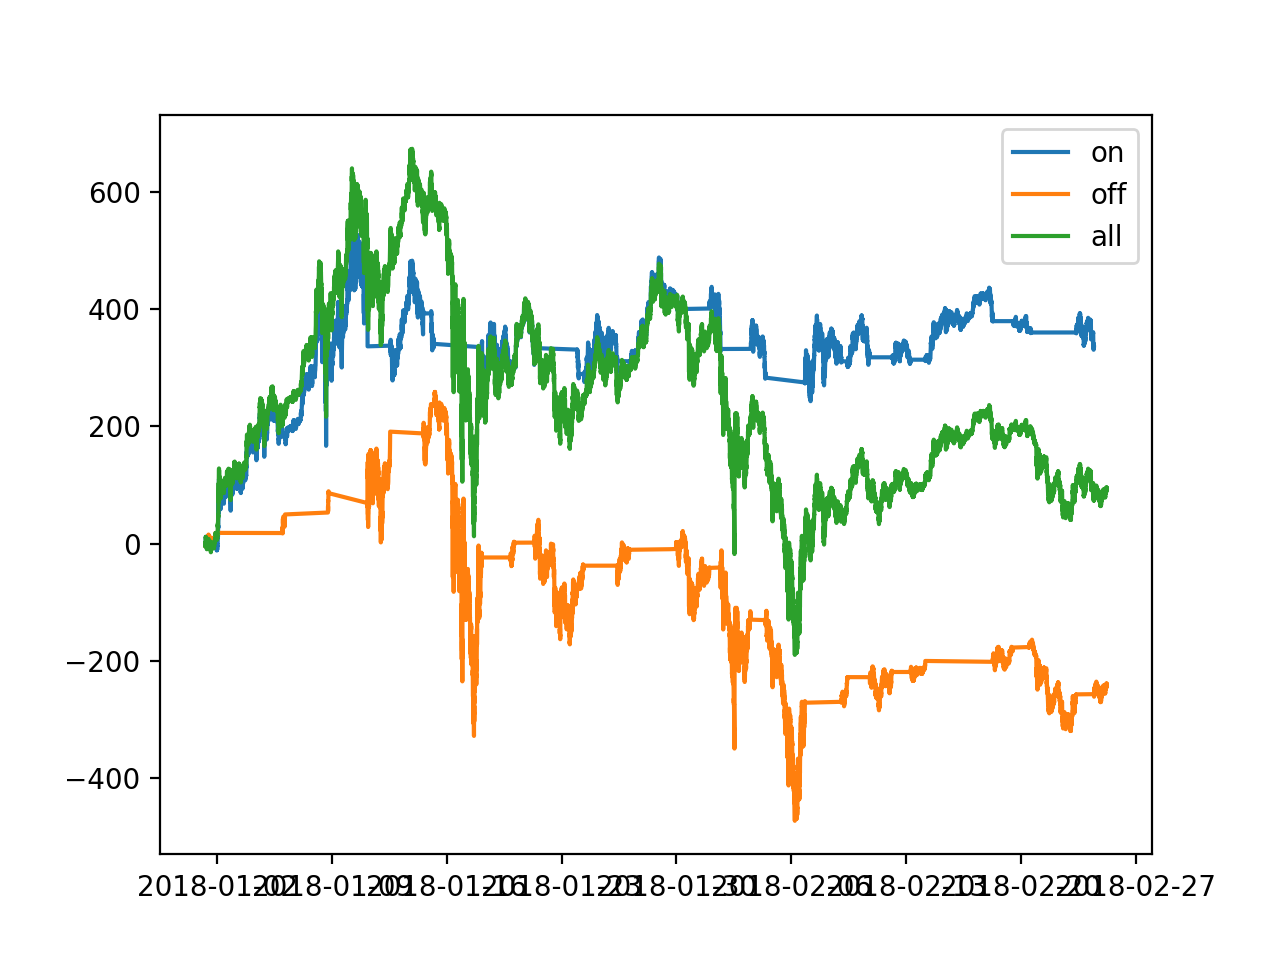

In [126]:
(fig, axis) = plt.subplots(1, 1, sharex=True)
axis.plot(on.cumsum())
axis.plot(off.cumsum())
axis.plot(returns.cumsum())
axis.legend(['on', 'off', 'all'])

In [127]:
daily = on.resample('1d').sum()
print(daily.mean(), daily.std(), daily.mean()/daily.std())

7.268478260869561 57.598160810428325 0.12619288808182882
